## Student Name: **Cornelius Brian Loe**
## Student ID: **45710783**
## Github Repo URL = https://github.com/MQCOMP2200-S2-2020/portfolio-2020-BrianLoe

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
import datetime
from datetime import datetime

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
result = strava.join(cheetah, how='inner')
result.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


## 1. Removing Rides With No Measured Power

In [5]:
resultClean = result.drop( result.index[result.device_watts==0])
print(resultClean.shape)
resultClean.head()

(209, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


## 2. Distributions For Key Variables

Text(0.5, 0, 'Time')

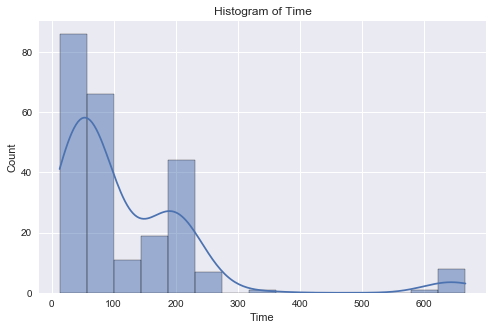

In [14]:
plt.figure(figsize=(8,5))
time=result.elapsed_time
sns.histplot(time, kde=True)
plt.title("Histogram of Time")
plt.xlabel('Time')

Text(0.5, 0, 'Distance')

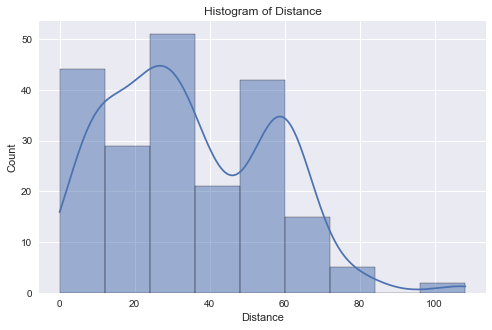

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(resultClean.distance, kde=True)
plt.title("Histogram of Distance")
plt.xlabel('Distance')

Text(0.5, 0, 'Average Speed')

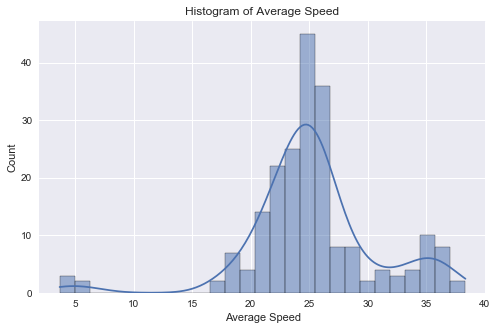

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(resultClean['Average Speed'], kde=True)
plt.title("Histogram of Average Speed")
plt.xlabel('Average Speed')

Text(0.5, 0, 'Average power')

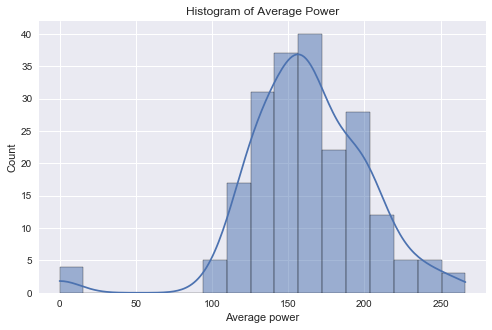

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(resultClean["Average Power"], kde=True)
plt.title('Histogram of Average Power')
plt.xlabel('Average power')

Text(0.5, 0, 'TSS score')

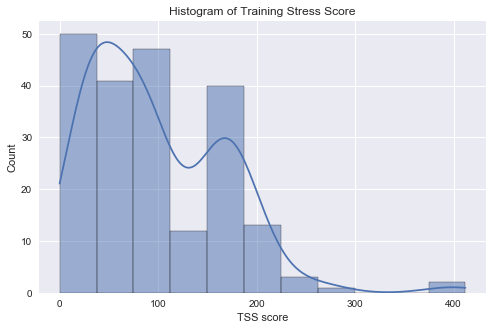

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(resultClean.TSS, kde=True)
plt.title("Histogram of Training Stress Score")
plt.xlabel('TSS score')

We can look from the histograms above that all the key variables have a similar distribution which is skewed distribution.
<br>However, not all variables have the same skewed distribution, in fact 3 of 5 variables have positive skewed distribution which are `time`, `distance`, `TSS`. Variable `Average Speed` and `Average Power` have a negative skewed distribution.</br>

## 3. Correlation/Relationship Between Variables

### All selected variables correlation

[Text(0.5, 0, 'Distance'),
 Text(1.5, 0, 'moving_time'),
 Text(2.5, 0, 'Average Speed'),
 Text(3.5, 0, 'average_heartrate'),
 Text(4.5, 0, 'Average Power'),
 Text(5.5, 0, 'NP'),
 Text(6.5, 0, 'Elevation Gain'),
 Text(7.5, 0, 'TSS')]

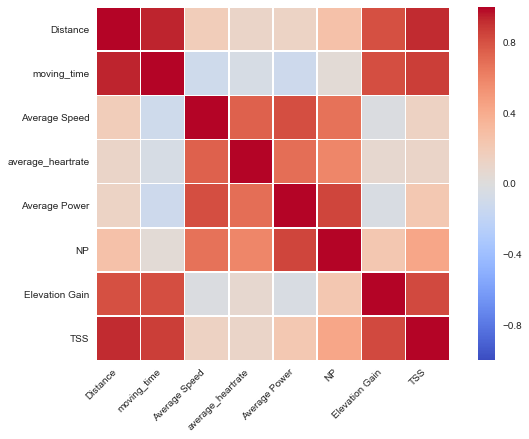

In [13]:
plt.figure(figsize=(10,6.5))
new=resultClean[['Distance','moving_time','Average Speed','average_heartrate','Average Power','NP','Elevation Gain','TSS']]
corr=new.corr()
HTM=sns.heatmap(corr,vmin=-1,vmax=1,center=0,square=True,linewidths=.5,cmap="coolwarm")
HTM.set_xticklabels(HTM.get_xticklabels(), rotation=45, horizontalalignment='right')

### Distance

r= 0.93935573357138


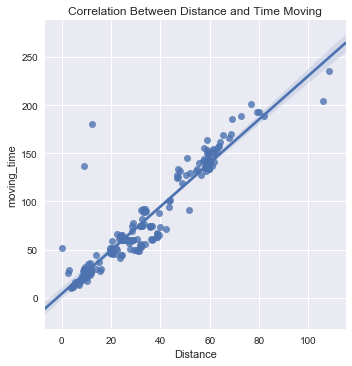

In [14]:
sns.lmplot(x='Distance', y='moving_time',data=resultClean)
plt.title("Correlation Between Distance and Time Moving")
print("r=",resultClean['Distance'].corr(resultClean['moving_time']))

r=  0.9225408334118376


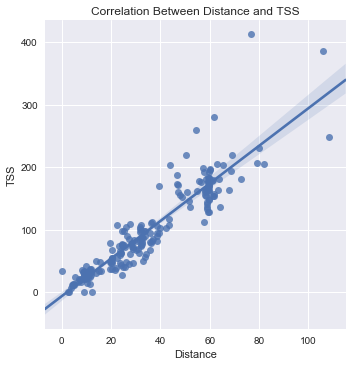

In [15]:
sns.lmplot(x='Distance', y='TSS',data=resultClean)
plt.title("Correlation Between Distance and TSS")
print("r= ",resultClean['Distance'].corr(resultClean['TSS']))

r=  0.8054857735963278


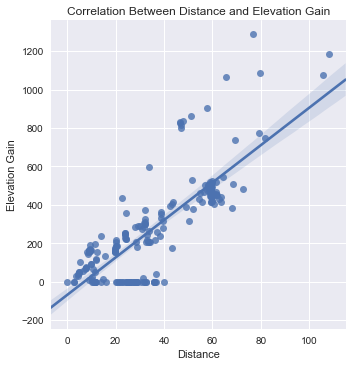

In [16]:
sns.lmplot(x='Distance', y='Elevation Gain',data=resultClean)
plt.title("Correlation Between Distance and Elevation Gain")
print("r= ",resultClean['Distance'].corr(resultClean['Elevation Gain']))

The only strong relationship `distance` have is with `moving_time`, `TSS`, and `Elevation Gain`. The remaining variables have less impact on `distance`.
<br>From the scatter plot above we can see there is a positive correlation between distance with `moving_time`, `TSS`, and `Elevation Gain`.</br>
<br>As the distance increases, moving time also increases. The more people travelled the more moving time their spend.</br>
<br>For `distance` and `TSS` we could assume that the higher people travelled the more harder the ride was.</br>
<br>Lastly between `distance` and `Elevation Gain` we can assume that the more distance travelled the more they climbed over the ride.</br>

### Moving Time

r=  0.8713678192103493


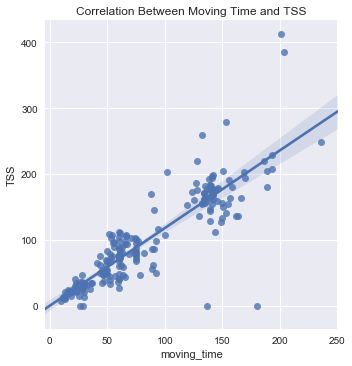

In [17]:
sns.lmplot(x='moving_time', y='TSS',data=resultClean)
plt.title("Correlation Between Moving Time and TSS")
print("r= ",resultClean['moving_time'].corr(resultClean['TSS']))

r=  0.8131463018983256


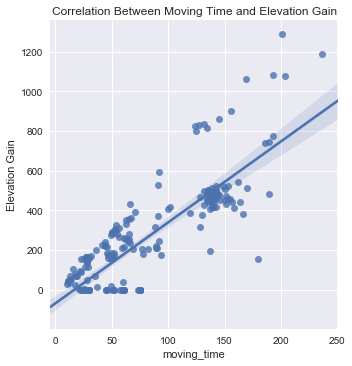

In [18]:
sns.lmplot(x='moving_time', y='Elevation Gain',data=resultClean)
plt.title("Correlation Between Moving Time and Elevation Gain")
print("r= ",resultClean['moving_time'].corr(resultClean['Elevation Gain']))

The variable `moving_time` has a strong relationship with `TSS` and `Elevation Gain`. 
<br>From the two plots above, they both indicate a positive correlation.</br>
<br>We could assume that as moving time increases, `TSS` and `Elevation Gain` increase.</br>
<br>It might be because as people spend a lot time moving the harder the ride was and also the more climbing they had to do.</br>

### Average Speed

r=  0.7423876382122438


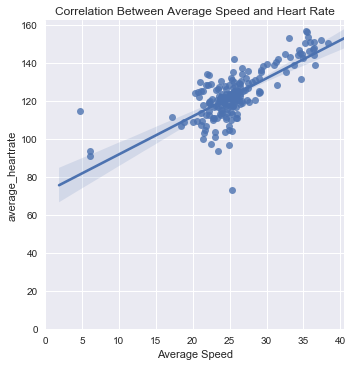

In [19]:
sns.lmplot(x='Average Speed', y='average_heartrate',data=resultClean)
plt.title("Correlation Between Average Speed and Heart Rate")
plt.ylim(0,None)
plt.xlim(0,None)
print("r= ",resultClean['Average Speed'].corr(resultClean['average_heartrate']))

r=  0.8144029024867827


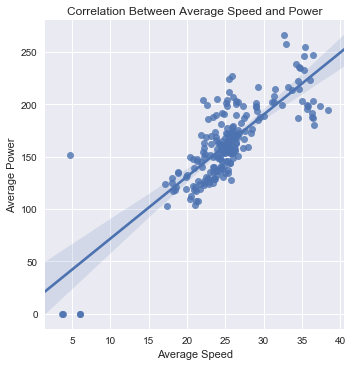

In [20]:
sns.lmplot(x='Average Speed', y='Average Power',data=resultClean)
plt.title("Correlation Between Average Speed and Power")
print("r= ",resultClean['Average Speed'].corr(resultClean['Average Power']))

r=  0.6748568529738261


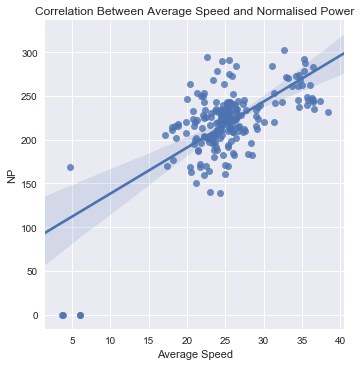

In [21]:
sns.lmplot(x='Average Speed', y='NP',data=resultClean)
plt.title("Correlation Between Average Speed and Normalised Power")
print("r= ",resultClean['Average Speed'].corr(resultClean['NP']))

There is three variables that strongly impact `average speed` which are heart rate, power, and normalised power.
<br>From the plot we could assume that heart rate, power, and normalised power increase as average speed increases.</br>
<br>It might be due to high speed, people's heart rate increases and also their power/effort increases.</br>

### Heart Rate

r=  0.6924129961457289


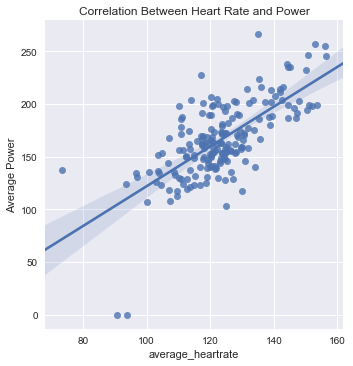

In [22]:
sns.lmplot(x='average_heartrate', y='Average Power',data=resultClean)
plt.title("Correlation Between Heart Rate and Power")
print("r= ",resultClean['average_heartrate'].corr(resultClean['Average Power']))

r=  0.593090881501513


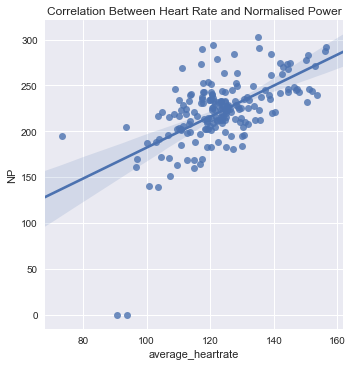

In [23]:
sns.lmplot(x='average_heartrate', y='NP',data=resultClean)
plt.title("Correlation Between Heart Rate and Normalised Power")
print("r= ",resultClean['average_heartrate'].corr(resultClean['NP']))

Heart rate is strongly related to power and normalised power.
<br>From the plot we can say that they both have positive correlation.</br>
<br>Power and normalised power might increase due to people's high heart rate, the more effort they put into the more high heart rate they have.</br>

### Power

r=  0.8444869823156335


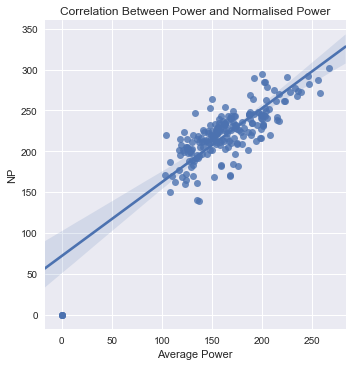

In [24]:
sns.lmplot(x='Average Power', y='NP',data=resultClean)
plt.title("Correlation Between Power and Normalised Power")
print("r= ",resultClean['Average Power'].corr(resultClean['NP']))

Power and normalised power have a strong relationship. They have a positive correlation by looking at the scatter plot.
<br>Normalised power is a smoothed version of power measurement, and it described above that they are generally higher than power.</br>
<br>So we could assume that as power increases, normalised power also increases due to normalised power is a similar variable to `Average Power`.

### Training Stress Score (TSS)

r=  0.8289280060266029


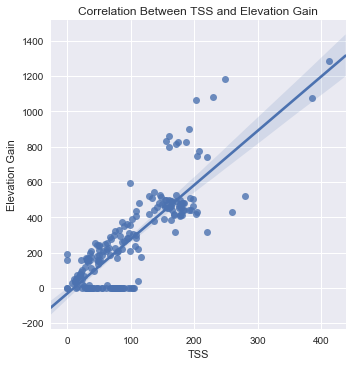

In [25]:
sns.lmplot(x='TSS', y='Elevation Gain',data=resultClean)
plt.title("Correlation Between TSS and Elevation Gain")
print("r= ",resultClean['TSS'].corr(resultClean['Elevation Gain']))

`TSS` have a strong relationship with `Elevation Gain`. Looking at the scatter plot we could assume that they have positive correlation.
<br>As both variables also have a strong relationship with `moving_time` and `Distance`, it is predictable that `TSS` and `Elevation Gain` are related.</br>
<br>It might be due to more climb on people's ride the harder it was.</br>

## 4. Differences of Categories in Workout Type

### Distance and Moving Time

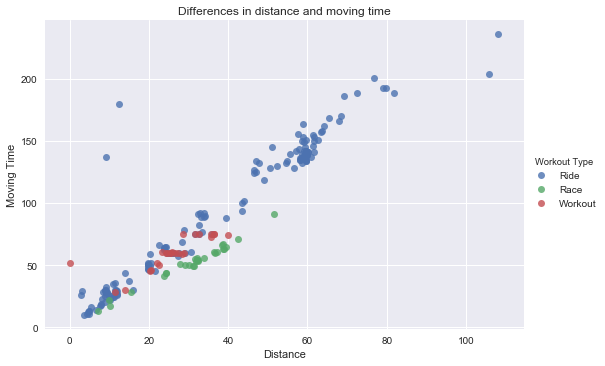

In [26]:
DistMT=sns.lmplot(
    x="Distance", y="moving_time", data=resultClean, 
    hue="workout_type", fit_reg=False, legend_out=True, height=5, aspect=1.5
)
plt.title('Differences in distance and moving time')
DistMT._legend.set_title("Workout Type")
DistMT.set(ylabel="Moving Time")

There is something interesting from the scatter plot above. It shows three different type of workout and the differences between them in relation between `Distance` and `moving_time`. `Ride` type have a different distribution than the other two, so let's see from the boxplot.

[Text(0.5, 0, 'Workout Type')]

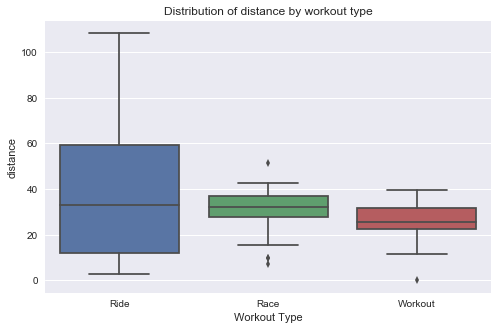

In [27]:
plt.figure(figsize=(8,5))
g=sns.boxplot(x="workout_type", y='distance', data =resultClean)
plt.title("Distribution of distance by workout type")
g.set(xlabel='Workout Type')

From their distributions, we can see that the type `Ride` has more variation than other types. This might be due to `race` and `workout` are targeted `workout type`. By targeted it means that people tend to target how far they want to workout or race.
<br>A race might be just a few distance because that is the objective of race and usually they have a similar target distance. While a workout is different for each people, but they have a similar range. 
<br>Meanwhile `ride` type might have no serious target because it is just a casual ride, so they vary.</br>

[Text(0.5, 0, 'Workout Type')]

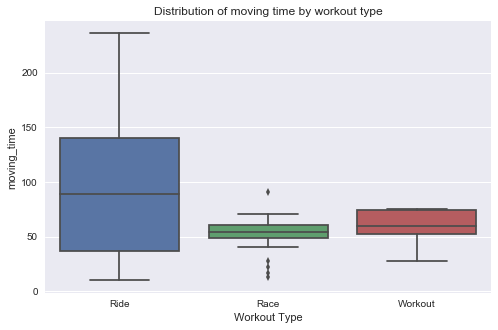

In [28]:
plt.figure(figsize=(8,5))
g=sns.boxplot(x="workout_type", y='moving_time', data =resultClean)
plt.title("Distribution of moving time by workout type")
g.set(xlabel='Workout Type')

Again, `ride` type has more variation than the others for `moving_time`. For `race` and `workout` type they have relatively less variation. People who race have a smaller moving time than the others, while workout have has a slightly bigger variation.

### Average Speed and Average Power

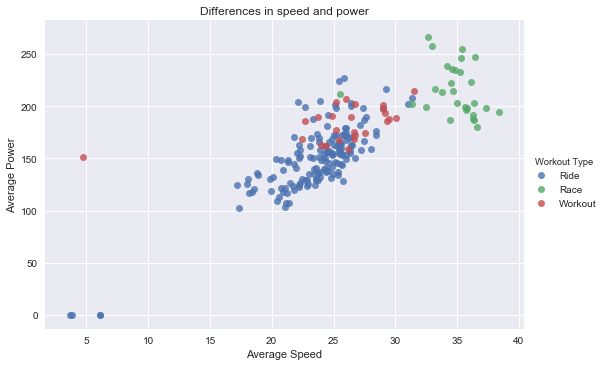

In [29]:
SpeedPwr=sns.lmplot(
    x="Average Speed", y="Average Power", data=resultClean, 
    hue="workout_type", fit_reg=False, legend_out=True, height=5, aspect=1.5
)
plt.title('Differences in speed and power')
SpeedPwr._legend.set_title("Workout Type")

The scatter plot above shows the different type of workout that affect average speed and average power. The plot indicates that `race` type has a higher average speed and average power than the other types, while `workout` type is in between race and ride. 

[Text(0.5, 0, 'Workout Type')]

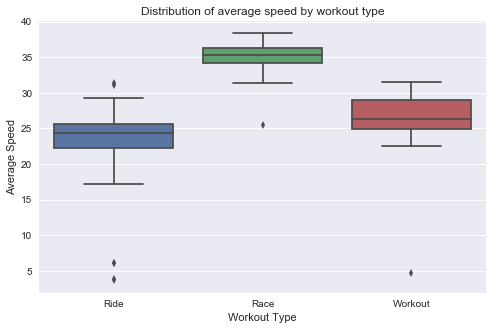

In [30]:
plt.figure(figsize=(8,5))
g1=sns.boxplot(x="workout_type", y='Average Speed', data =resultClean)
plt.title("Distribution of average speed by workout type")
g1.set(xlabel='Workout Type')

From the distribution, it indicates that `race` have a big value for average speed followed by `workout` and `ride`.
<br>The differences can be seen from the boxplot that race is more serious type that it has a small variation. We can assume that people that race has a similar speed range, while a workout and ride type has a slightly bigger variation.</br>

[Text(0.5, 0, 'Workout Type')]

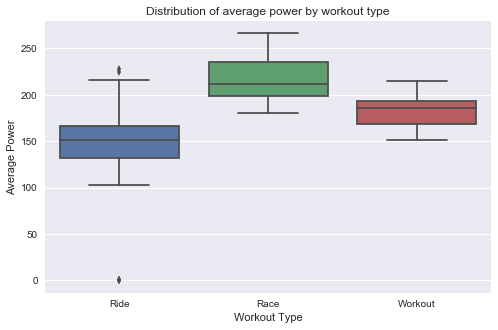

In [31]:
plt.figure(figsize=(8,5))
g1=sns.boxplot(x="workout_type", y='Average Power', data =resultClean)
plt.title("Distribution of average power by workout type")
g1.set(xlabel='Workout Type')

The boxplot above is relatively similar to the boxplot of average speed. The reason might because race is a more serious type that people put more effort into it than `workout` and `ride` type.
<br>The distribution for the three types are quite similar except for `workout` type which just has a slightly smaller variation.</br>

### Average Cadence and NP

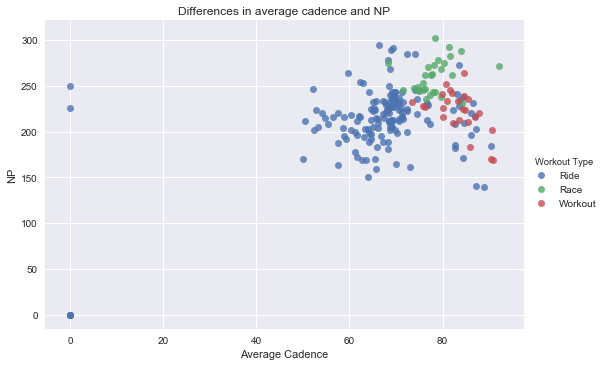

In [32]:
CadNP=sns.lmplot(
    x="Average Cadence", y="NP", data=resultClean, 
    hue="workout_type", fit_reg=False, legend_out=True, height=5, aspect=1.5
)
plt.title('Differences in average cadence and NP')
CadNP._legend.set_title("Workout Type")

From the scatter plot above, it seems that the average cadence for the three workout types are slightly different, however the `NP` is in similar range except `race` type which looks a little bit higher than the two.
<br>`Workout` and `ride` type have a quite similar range.</br>

[Text(0.5, 0, 'Workout Type')]

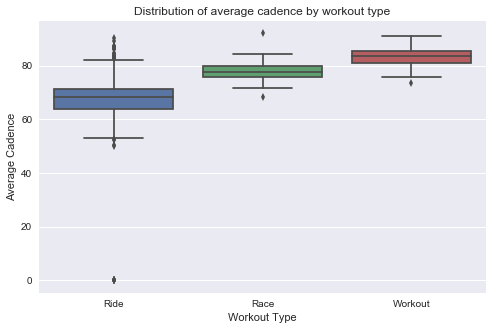

In [33]:
plt.figure(figsize=(8,5))
g2=sns.boxplot(x="workout_type", y='Average Cadence', data =resultClean)
plt.title("Distribution of average cadence by workout type")
g2.set(xlabel='Workout Type')

This boxplot of average cadence above shows us that the three types are very much different in terms of value. `Workout` type seems to have the biggest value of all three, whilst `ride` type has the lowest value.
<br>`Workout` and `race` type only have a slight different in value. This might be because workout and race is more targeted as explained in the analysis earlier. Hence, they have a higher average cadence but in less time than ride type.</br>

## 5. Relationship between Rides and Weather

Reading weather datasets 

In [7]:
weather1=pd.read_csv("data/weather_data_2018.csv")
weather1.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y
1,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y
2,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y
3,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y
4,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y


In [8]:
weather2=pd.read_csv("data/weather_data_2019.csv")
weather2.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66212,2019,1,1,34.0,1.0,Y
1,IDCJAC0010,66212,2019,1,2,30.6,1.0,Y
2,IDCJAC0010,66212,2019,1,3,28.9,1.0,Y
3,IDCJAC0010,66212,2019,1,4,33.7,1.0,Y
4,IDCJAC0010,66212,2019,1,5,39.3,1.0,Y


In [9]:
# making date in resultClean datetime data type so it can be compared later
resultClean.date=pd.to_datetime(resultClean.date, format='%m/%d/%y')
resultClean.date.head()

2018-01-27 19:39:49+00:00   2018-01-28
2018-01-27 20:01:32+00:00   2018-01-28
2018-02-05 21:06:42+00:00   2018-02-06
2018-02-07 06:59:05+00:00   2018-02-07
2018-02-09 19:18:03+00:00   2018-02-10
Name: date, dtype: datetime64[ns]

#### Combining `Year` `Month` `Day` to a column named `date` and then converting the data type into datetime

In [10]:
weather1['date']=weather1['Year'].astype(str)+'-'+weather1['Month'].astype(str)+'-'+weather1['Day'].astype(str)
weather1.date.head()

0    2018-1-1
1    2018-1-2
2    2018-1-3
3    2018-1-4
4    2018-1-5
Name: date, dtype: object

In [11]:
weather1['date']=pd.to_datetime(weather1.date, format="%Y-%m-%d")
weather1.date.head()

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: date, dtype: datetime64[ns]

In [12]:
weather2['date']=weather2['Year'].astype(str)+'-'+weather2['Month'].astype(str)+'-'+weather2['Day'].astype(str)
weather2.date.head()

0    2019-1-1
1    2019-1-2
2    2019-1-3
3    2019-1-4
4    2019-1-5
Name: date, dtype: object

In [13]:
weather2['date']=pd.to_datetime(weather2.date, format="%Y-%m-%d")
weather2.date.head()

0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-05
Name: date, dtype: datetime64[ns]

#### Dropping columns that are not necessary

In [14]:
weather1DO=weather1.drop(['Product code', 'Bureau of Meteorology station number', 'Year', 'Month','Day','Quality',
                          'Days of accumulation of maximum temperature'], axis=1)
weather1DO.head()

,Maximum temperature (Degree C),date
0,30.9,2018-01-01
1,28.8,2018-01-02
2,25.3,2018-01-03
3,25.4,2018-01-04
4,28.9,2018-01-05


In [15]:
weather2DO=weather2.drop(['Product code', 'Bureau of Meteorology station number', 'Year', 'Month','Day','Quality',
                          'Days of accumulation of maximum temperature'], axis=1)
weather2DO.head()

,Maximum temperature (Degree C),date
0,34.0,2019-01-01
1,30.6,2019-01-02
2,28.9,2019-01-03
3,33.7,2019-01-04
4,39.3,2019-01-05


#### Combining data from year 2018 and 2019

In [16]:
weathers=weather1DO.append(weather2DO, ignore_index=True)
print(weathers.shape)
weathers.head()

(730, 2)


,Maximum temperature (Degree C),date
0,30.9,2018-01-01
1,28.8,2018-01-02
2,25.3,2018-01-03
3,25.4,2018-01-04
4,28.9,2018-01-05


#### Merging rides with weather

In [17]:
ridesWeather=pd.merge(resultClean, weathers, on=['date'], how='left')
print(ridesWeather.shape)
ridesWeather.head()

(209, 373)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,Maximum temperature (Degree C)
0,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,222.856,0.83155,20.2257,30.7
1,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,245.365,0.91554,94.5787,30.7
2,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,253.702,0.94665,98.3269,28.2
3,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,232.644,0.86808,171.0780,28.1
4,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,212.726,0.79375,147.7970,30.3


### Relationships with Temperature

#### Distance with Temperature

r=  0.002035828456277459


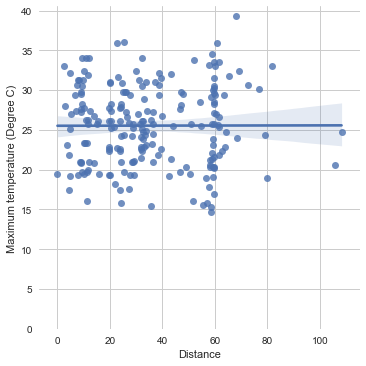

In [18]:
sns.set_style('whitegrid')
sns.lmplot(x='Distance', y='Maximum temperature (Degree C)',data=ridesWeather)
plt.ylim(0, None)
print("r= ",ridesWeather['Distance'].corr(ridesWeather['Maximum temperature (Degree C)']))

The relationship between distance travelled and temperature is find out by doing scatter plot and correlation as can be seen above. Although r score is positive, the score is very close to zero. So, it seems that distance travelled and temperature have no relationship or zero correlation. 

**Average Speed with temperature**

r=  -0.09104992282425789


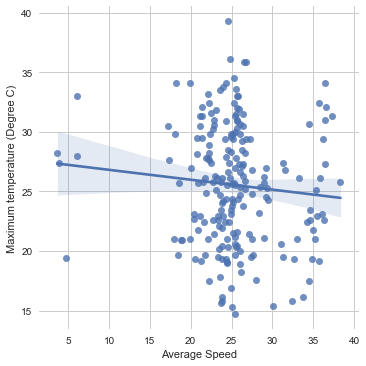

In [19]:
sns.set_style('whitegrid')
sns.lmplot(x='Average Speed', y='Maximum temperature (Degree C)',data=ridesWeather)
print("r= ",ridesWeather['Average Speed'].corr(ridesWeather['Maximum temperature (Degree C)']))

The scatter plot shows that average speed and temperature holds a negative correlation. R score shows that the score is very close to zero. Therefore, we can assume that they hold no relationship or correlation.

## Conclusion

- For key variables, they have skewed distribution which 3 of 5 have positive skewed distribution and the rest have negative skewed distribution
- For correlation, pairs that have strong correlation are:
  * Distance~Moving Time+TSS+Elevation Gain
  * Moving Time~TSS+Elevation Gain
  * Average Speed~Heart rate+power+NP
  * Heart rate~power+NP
  * Power~NP
  * TSS~Elevation Gain  
  They each have a positive relationship.
- For differences in workout type, ride type has more variation in distance and moving time, race type has the highest value in average speed and average power, workout type has the highest value in average cadence and it differs compared to other types.
- For correlation between weather and rides, they seem to have a little correlation. Only average speed~temperature it seems to have a relationship though it is not strong relationship.

## Challenge

### What leads to more kudos?

                   kudos  Distance  moving_time  Duration  Elevation Gain  \
kudos           1.000000  0.753892     0.663127  0.659296        0.637602   
Distance        0.753892  1.000000     0.939356  0.896883        0.805486   
moving_time     0.663127  0.939356     1.000000  0.975361        0.813146   
Duration        0.659296  0.896883     0.975361  1.000000        0.763200   
Elevation Gain  0.637602  0.805486     0.813146  0.763200        1.000000   
TSS             0.694799  0.922541     0.871368  0.826206        0.828928   
Calories (HR)   0.634821  0.872758     0.825105  0.766704        0.744963   

                     TSS  Calories (HR)  
kudos           0.694799       0.634821  
Distance        0.922541       0.872758  
moving_time     0.871368       0.825105  
Duration        0.826206       0.766704  
Elevation Gain  0.828928       0.744963  
TSS             1.000000       0.841321  
Calories (HR)   0.841321       1.000000  


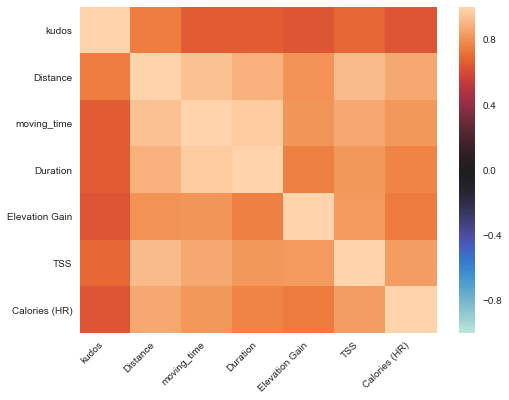

In [49]:
plt.figure(figsize=(8,6))
selected=resultClean[['kudos', 'Distance', 'moving_time', 'Duration', 'Elevation Gain', 'TSS', 'Calories (HR)','workout_type']]
corrSelect=selected.corr()
CTH=sns.heatmap(corrSelect,vmin=-1,vmax=1,center=0)
CTH.set_xticklabels(CTH.get_xticklabels (), rotation=45,horizontalalignment='right')
print(corrSelect)

From the heatmap and correlations score, there are many variables/factors that leads to more kudos. Above we can see that `Distance`, `moving_time`, `Duration`, `Elevation Gain`, `TSS`, `Calories (HR)` are the most impactful in leading to more kudos of the other main variables. In more narrow, the most impactful from the selected variables are `Distance`. Therefore, `Distance` is what lead to more kudos.

### Plot Summaries of Km Ridden, Sum of TSS and average of average speed for each month

Grouping by month for each variable (`distance`, `TSS`, `Average Speed`).
<br>First for distance.

In [44]:
#Copying ridesWeather so the original doesnt change
ridesWeatherTemp=ridesWeather.copy()
ridesWeatherTemp=ridesWeatherTemp.sort_values(by='date', ascending=True)
ridesWeatherTemp = ridesWeatherTemp.set_index(pd.DatetimeIndex(ridesWeatherTemp['date']))
month_df=ridesWeatherTemp.groupby(pd.Grouper(freq='M'))['distance'].sum()
month_df=month_df.to_frame()
month_df.reset_index(inplace=True)
month_df.head()

,date,distance
0,2018-01-31,46.2
1,2018-02-28,360.9
2,2018-03-31,468.0
3,2018-04-30,450.2
4,2018-05-31,273.3


For TSS

In [45]:
tss_df=ridesWeatherTemp.groupby(pd.Grouper(freq='M'))['TSS'].sum()
tss_df=tss_df.to_frame()
tss_df.head()

,TSS
date,
2018-01-31,114.8044
2018-02-28,1087.2924
2018-03-31,1381.0867
2018-04-30,1324.5363
2018-05-31,718.8654


For Average Speed

In [20]:
avgSpeed_df=ridesWeatherTemp.groupby(pd.Grouper(freq='M'))['Average Speed'].mean()
avgSpeed_df=avgSpeed_df.to_frame()
avgSpeed_df.head()

,Average Speed
date,
2018-01-31,30.230700
2018-02-28,24.103918
2018-03-31,25.128942
2018-04-30,22.974325
2018-05-31,24.518643


Plotting all 3 variables together by two different y scales. The left side for distance and TSS, and the right side for average speed.

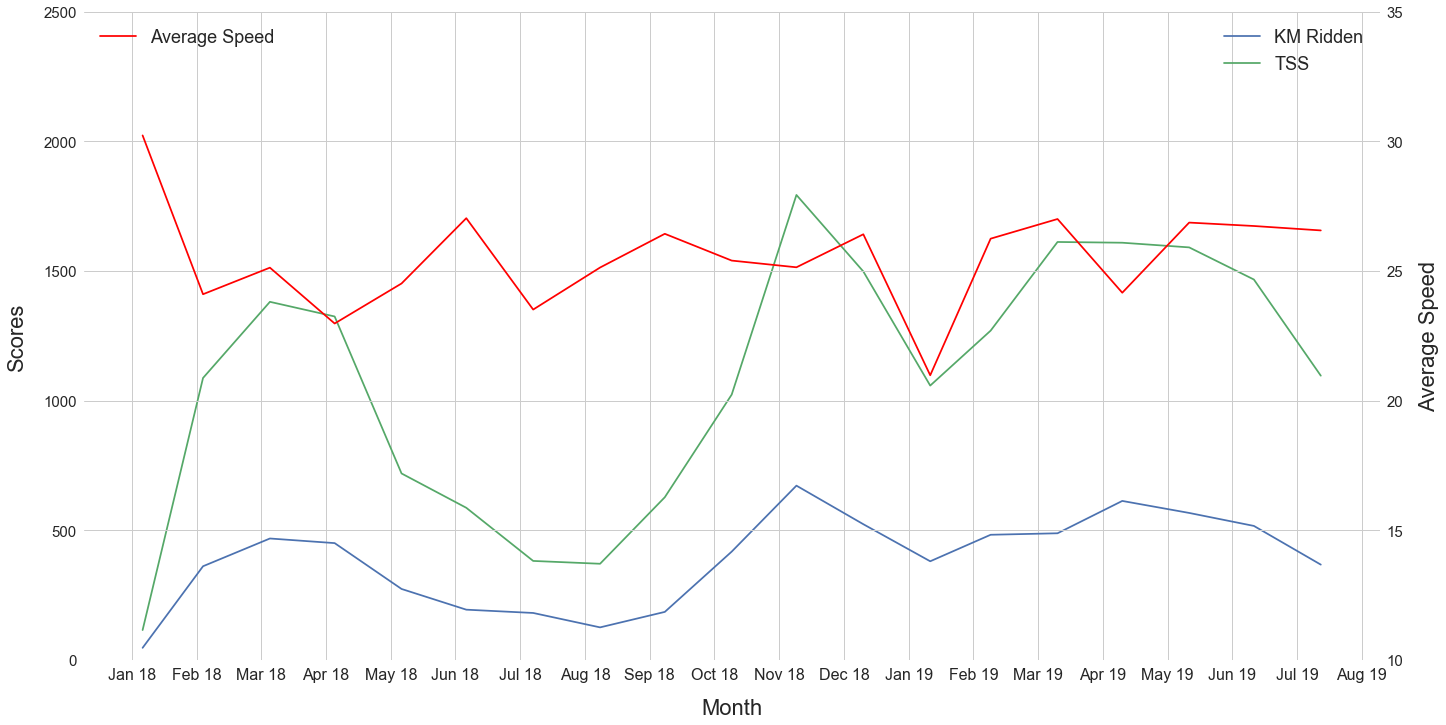

In [52]:
fig=plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
import matplotlib.dates as mdates
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b %y')
axes=fig.add_axes([0.0, 0.0, 0.9, 0.9])
axes=sns.lineplot(x=month_df.date, y=month_df.distance, label='KM Ridden', )
axes.set_ylabel('Scores', fontsize=22, labelpad=16)
axes.set_xlabel('Month', fontsize=22, labelpad=16)
axes.xaxis.set_tick_params(labelsize=16)
axes.yaxis.set_tick_params(labelsize=15)
axes=sns.lineplot(x=tss_df.index, y=tss_df.TSS, label='TSS')
plt.ylim(0,2500)
plt.legend(fontsize=18)
#avgSpeedP=sns.lineplot(x=avgSpeed_df.index, y=avgSpeed_df['Average Speed'], label='Average Speed')
axes1=axes.twinx()
axes1=sns.lineplot(x=avgSpeed_df.index, y=avgSpeed_df['Average Speed'], color='red', label='Average Speed')
X = plt.gca().xaxis
Y = plt.gca().yaxis
X.set_major_formatter(fmt)
import matplotlib.ticker as ticker
X.set_major_locator(ticker.MaxNLocator(24))
Y.set_major_locator(ticker.MaxNLocator(6))
plt.ylim(10,35)
axes1.legend(loc='upper left', frameon=False, fontsize=18)
axes1.yaxis.set_tick_params(labelsize=15)
axes1.set_ylabel('Average Speed', fontsize=22, labelpad=16)
axes.grid(False, axis='y')

For TSS each month starting from January 2018, it peaks between November and December 2018.
<br>The line starts rising from January to April, but it starts to dropping down towards August.</br>
<br>Then the line starts to rise again until it peaks between november and december.</br>
<br>Then it starts falling again towards January 2019 and then its fluctuating around 1100km and 1600km between January through mid-July</br>
<br>This could mean that between November and December 2018 riders find it was more hard to ride during this months. It is more stable around January through July 2019.</br>

For Km ridden each month, it peaks around November and December 2018 (similar to TSS). 
<br>The plot have a similar shape to plot for TSS, though it doesnt drop a lot.</br>
<br>The distance ridden goes under 500km each month throughout 2018 except for around november and december which it peaks out.</br>
<br>Then it starts off at around 400km each month and it goes around 400km t0 600km each month until mid-July.</br>
<br>If we correlate Km ridden and TSS, it peaks around the same month which is why it was reasonable that TSS score is high when Km ridden is high.</br>
<br>This could mean that riders tend to have more TSS when having more Km ridden.

For Average Speed each month, it starts off highly then it falls down towards April with only slight increase in between.
<br>Then it starts fluctuating throughout the year until 2019, though it doesnt drops a lot, only in between January and February 2019 when it reaches the lowest captured average speed.</br>
<br>Average speed has more stable graph compared to the other two, it fluctuates a lot between 20-30.</br>
<br>It only drops in between January and February, and it is the same case for TSS and Km ridden.